In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

In [2]:
#Read files 
a0 = pd.read_csv('A0B0.csv',sep=' ',names=['Time','NADPH'])
a05 = pd.read_csv('A0.5B24.csv',sep=',',names=['Time','NADPH'])
a1 = pd.read_csv('A1B24.csv',sep=',',names=['Time','NADPH'])
a2 = pd.read_csv('A2B24.csv',sep=',',names=['Time','NADPH'])
a4 = pd.read_csv('A4B24.csv',sep=',',names=['Time','NADPH'])


In [3]:
b15 = pd.read_csv('A8B1.5.csv',sep=',',names=['Time','NADPH'])
b3 = pd.read_csv('A8B3.csv',sep=',',names=['Time','NADPH'])
b6 = pd.read_csv('A8B6.csv',sep=',',names=['Time','NADPH'])
b12 = pd.read_csv('A8B12.csv',sep=',',names=['Time','NADPH'])
b24 = pd.read_csv('A8B24.csv',sep=',',names=['Time','NADPH'])

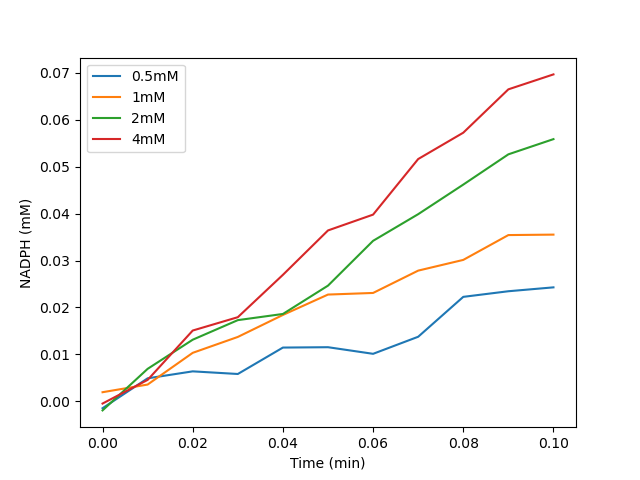

In [4]:
#Plot experiments when a was varied and b=24mM
df, ax = plt.subplots()  
ax.plot(a05.Time, a05.NADPH, label='0.5mM')
ax.plot(a1.Time, a1.NADPH, label='1mM')
ax.plot(a2.Time, a2.NADPH, label='2mM')
ax.plot(a4.Time, a4.NADPH, label='4mM')
plt.xlabel('Time (min)')
plt.ylabel('NADPH (mM)')
ax.plot(kind ='scatter')
ax.legend()

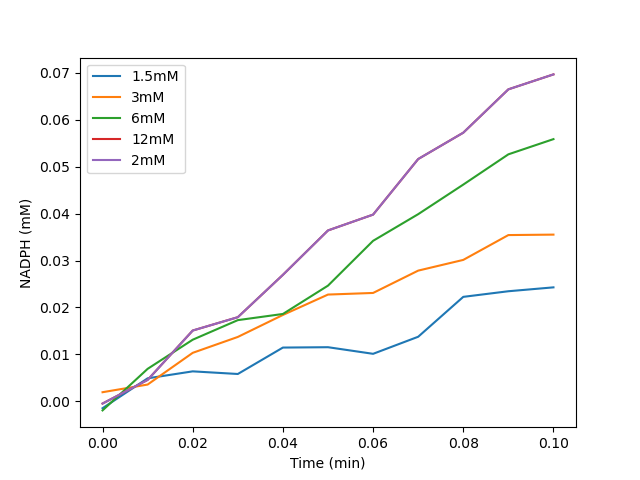

In [5]:
#Plot experiments when b was varied and a=8mM
f, ax = plt.subplots()
plt.plot(b15.Time, a05.NADPH, label='1.5mM')
plt.plot(b3.Time, a1.NADPH, label='3mM')
plt.plot(b6.Time, a2.NADPH, label='6mM')
plt.plot(b12.Time, a4.NADPH, label='12mM')
plt.plot(b24.Time, a4.NADPH, label='2mM')
plt.xlabel('Time (min)')
plt.ylabel('NADPH (mM)')
ax.plot(kind ='scatter')
plt.legend()

In [6]:
#Linear regressions for a
reg5 = sp.stats.linregress(a05)
reg1 = sp.stats.linregress(a1)
reg2 = sp.stats.linregress(a2)
reg4 = sp.stats.linregress(a4)

#Linear regressions for b
reg15 = sp.stats.linregress(b15)
reg3 = sp.stats.linregress(b3)
reg6 = sp.stats.linregress(b6)
reg12 = sp.stats.linregress(b12)
reg24 = sp.stats.linregress(b24)

In [7]:
#Rates for all
a = ({0.5, 1, 2, 4, 8, 8, 8, 8, 8})
b = ({24, 24, 24, 24, 24, 1.5, 3, 6, 12, 24})
regressions = [reg5, reg1, reg2, reg4, reg15, reg3, reg6, reg12, reg24]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761
0.8250788434733143


In [9]:
#Dataframe for a
concs_a = np.array([0.5, 1, 2, 4, 1.5, 3, 6, 12, 24])
df1= pd.DataFrame({'a':concs_a,'Rate':rates})

In [10]:
#Dataframe for b
concs_b = np.array([0.5, 1, 2, 4, 1.5, 3, 6, 12, 24])
df2= pd.DataFrame({'b':concs_b,'Rate':rates})

In [11]:
#Combining dataframes
df1['b'] = 24 
df2['a'] = 8

In [12]:
df3 = pd.concat([df1,df2])
df3

a      Rate     b
0   0.5  0.241187  24.0
1   1.0  0.352630  24.0
2   2.0  0.574650  24.0
3   4.0  0.732286  24.0
4   1.5  0.254221  24.0
5   3.0  0.367954  24.0
6   6.0  0.556409  24.0
7  12.0  0.701204  24.0
8  24.0  0.825079  24.0
0   8.0  0.241187   0.5
1   8.0  0.352630   1.0
2   8.0  0.574650   2.0
3   8.0  0.732286   4.0
4   8.0  0.254221   1.5
5   8.0  0.367954   3.0
6   8.0  0.556409   6.0
7   8.0  0.701204  12.0
8   8.0  0.825079  24.0

In [28]:
def v(Vf, a, b, Ka, Kb):
    return (Kf*a*b)/((Ka+a)(Kb+b))

In [30]:
from lmfit import Model
mymod = Model(v, independent_vars=['a','b'])
mypar = mymod.make_params(Vf=1, Ka=1, Kb=1)
myfit = mymod.fit(df3.Rate, mypar, a=df1.a, b=df2.b)
myfit

NameError: name 'Kf' is not defined

NameError: name 'myfit' is not defined

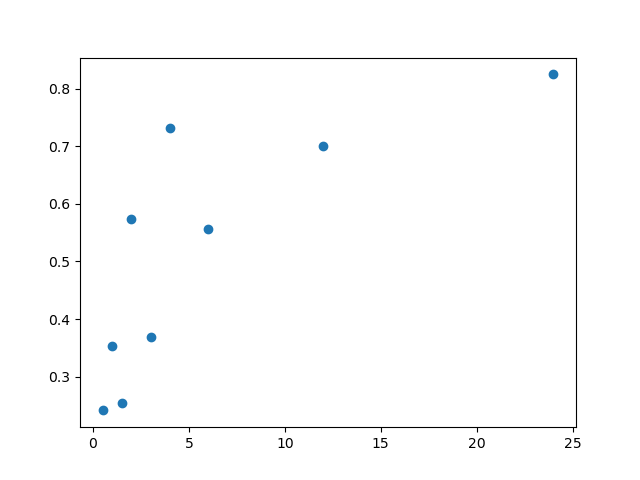

In [31]:
#Plot the fit for rate vs a
avals = np.linspace(0,25,101)
fig, ax = plt.subplots()
ax.plot(concs_a,rates, 'o', label='data')
ax.plot(avals, myfit.eval(a=avals), label='fit')
ax.set_xlabel('NADPH (mM)')
ax.set_ylabel('Rate(mM/s)')
ax.legend(loc='best')

NameError: name 'myfit' is not defined

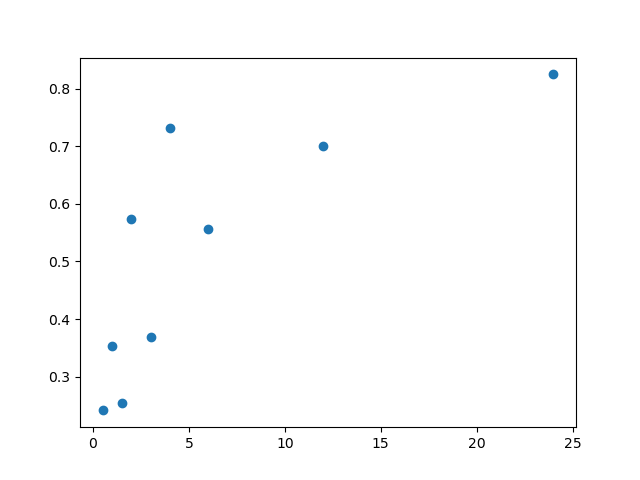

In [33]:
#Plot the fit for rate vs b
bvals = np.linspace(0,25,101)
fig, ax = plt.subplots()
ax.plot(concs_b,rates, 'o', label='data')
ax.plot(bvals, myfit.eval(b=bvals), label='fit')
ax.set_xlabel('NADPH (mM)')
ax.set_ylabel('Rate(mM/s)')
ax.legend(loc='best')